# Pre-Experiment Set Up

In [1]:
# Importing the libraries that will be required for this analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Remove warning that will appear when using the KNN classifier

from warnings import simplefilter

simplefilter(action = 'ignore', category = FutureWarning)

# Creation of a function that will be used to check if the grades are within one of a correct prediction 

def find_grade_within_one(x):
    
    if (x['Assessment Grade'] == 'FA' and x['Grade Prediction'] == 'FA'):
        return True
    elif (x['Assessment Grade'] == 'FA' and x['Grade Prediction'] == 'GA'):
        return True
    
    elif (x['Assessment Grade'] == 'GA' and x['Grade Prediction'] == 'FA'):
        return True
    elif (x['Assessment Grade'] == 'GA' and x['Grade Prediction'] == 'GA'):
        return True
    elif (x['Assessment Grade'] == 'GA' and x['Grade Prediction'] == 'B'):
        return True
    
    elif (x['Assessment Grade'] == 'B' and x['Grade Prediction'] == 'GA'):
        return True
    elif (x['Assessment Grade'] == 'B' and x['Grade Prediction'] == 'B'):
        return True
    elif (x['Assessment Grade'] == 'B' and x['Grade Prediction'] == 'C'):
        return True
    
    elif (x['Assessment Grade'] == 'C' and x['Grade Prediction'] == 'B'):
        return True
    elif (x['Assessment Grade'] == 'C' and x['Grade Prediction'] == 'C'):
        return True
    elif (x['Assessment Grade'] == 'C' and x['Grade Prediction'] == 'Start'):
        return True
    
    elif (x['Assessment Grade'] == 'Start' and x['Grade Prediction'] == 'C'):
        return True
    elif (x['Assessment Grade'] == 'Start' and x['Grade Prediction'] == 'Start'):
        return True
    elif (x['Assessment Grade'] == 'Start' and x['Grade Prediction'] == 'Stub'):
        return True
    
    elif (x['Assessment Grade'] == 'Stub' and x['Grade Prediction'] == 'Start'):
        return True
    elif (x['Assessment Grade'] == 'Stub' and x['Grade Prediction'] == 'Stub'):
        return True
    
    else:
        return False

# Experiment 4

## Setting up the training data

#### Reading in the Training Datasets

In [2]:
train_start_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TRAINING-DATA-1-CLEAN.csv')

train_extra_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TRAINING-DATA-2.csv')

#### Minor adjustments to make merging possible 

In [3]:
train_extra_df['Title'] = train_extra_df.apply(lambda x: x['Title'].replace('_', ' '), axis = 1)

train_extra_df.at[177, 'Title'] = '9/11: The Twin Towers'
train_start_df.at[203, 'Title'] = '1, 2, 3, Sun'

#### Merging the two DataFrames using inner join 

In [4]:
train_df = pd.merge(train_start_df, train_extra_df, on = 'Title', how = 'inner')

#### Using the created columns to calculate the missing fields 

In [5]:
train_df['Registered Edits'] = train_df.apply(lambda x: x['Revisions'] - x['IP Edits'] - x['Bot Edits'], axis = 1)
train_df['Major Edits'] = train_df.apply(lambda x: x['Revisions'] - x['Minor Edits'], axis = 1)
train_df['Registered Editors'] = train_df.apply(lambda x: x['Unique Editors'] - x['IP Editors'] - x['Bot Editors'], axis = 1)

#### Final training dataframe 

In [6]:
train_df

,Title,Assessment Grade,Size in Bytes,Revisions,Registered Edits,IP Edits,Bot Edits,Unique Editors,Major Edits,Minor Edits,...,Reverted Edits,Average Time Between Edits,Average Edits Per User,Average Edits Per Day,Average Edits Per Month,Average Edits Per Year,Edits Made By Top 10,Registered Editors,IP Editors,Bot Editors
0,The Empire Strikes Back,FA,212508,7951,5355,2394,202,2997,6455,1496,...,1434,24.0,2.7,1.3,31.5,378.0,1785,1320,1601,76
1,Planet of the Apes,FA,112394,3002,1736,1192,74,917,2479,523,...,308,40.8,3.3,0.8,18.2,218.7,997,378,508,31
2,Fight Club,FA,98321,6501,4207,2113,181,2785,4999,1502,...,1392,26.4,2.3,1.2,28.9,347.1,1848,1178,1563,44
3,Die Hard,FA,185451,5521,3378,1978,165,2616,4408,1113,...,1048,33.6,2.1,0.9,22.3,267.0,1319,1162,1401,53
4,Aliens (film),FA,208412,6412,3985,2227,200,2639,5092,1320,...,1185,26.4,2.4,1.1,26.5,318.1,1525,1143,1430,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,123Net,Stub,7375,57,32,15,10,31,43,14,...,1,1694.4,1.8,0.0,0.4,5.2,32,18,7,6
236,Adobe Sign,Stub,6432,39,25,10,4,24,26,13,...,1,904.8,1.6,0.0,0.8,9.7,25,15,5,4
237,AuthenTec,Stub,7098,42,22,11,9,31,32,10,...,1,1972.8,1.4,0.0,0.4,4.4,19,17,7,7
238,Box blade,Stub,2300,24,20,2,2,21,14,10,...,1,4528.8,1.1,0.0,0.2,1.9,12,18,2,1


## Setting up the Testing Data

#### Reading in the Datasets that will be used as testing data

In [7]:
test_start_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TEST-DATA-1-CLEAN.csv')

test_extra_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TEST-DATA-2.csv')

#### Minor adjustments to make the merging possible

In [8]:
test_extra_df['Title'] = test_extra_df.apply(lambda x: x['Title'].replace('_', ' '), axis = 1)

test_extra_df.at[0, 'Title'] = 'The Lord of the Rings (1978 film)'

#### Merging the two DataFrames using inner join 

In [9]:
test_df = pd.merge(test_start_df, test_extra_df, on = 'Title', how = 'inner')

#### Using the created columns to calculate the missing fields 

In [10]:
test_df['Registered Edits'] = test_df.apply(lambda x: x['Revisions'] - x['IP Edits'] - x['Bot Edits'], axis = 1)
test_df['Major Edits'] = test_df.apply(lambda x: x['Revisions'] - x['Minor Edits'], axis = 1)
test_df['Registered Editors'] = test_df.apply(lambda x: x['Unique Editors'] - x['IP Editors'] - x['Bot Editors'], axis = 1)

#### Final testing dataframe

In [11]:
test_df

,Title,Assessment Grade,Size in Bytes,Revisions,Registered Edits,IP Edits,Bot Edits,Unique Editors,Major Edits,Minor Edits,...,Reverted Edits,Average Time Between Edits,Average Edits Per User,Average Edits Per Day,Average Edits Per Month,Average Edits Per Year,Edits Made By Top 10,Registered Editors,IP Editors,Bot Editors
0,The Lord of the Rings (1978 film),FA,71762,1991,1319,575,97,794,1516,475,...,183,86.4,2.5,0.4,8.5,101.5,702,181,575,38
1,Ghostbusters,FA,208171,7243,4447,2571,225,3151,5746,1497,...,1145,24.0,2.3,1.2,29.7,357.0,1631,1313,1771,67
2,Edward Drinker Cope,FA,75975,901,666,145,90,363,588,313,...,95,189.6,2.5,0.2,3.8,46.0,323,220,102,41
3,Cooperative pulling paradigm,FA,86483,769,699,40,30,82,684,85,...,53,62.4,9.4,0.5,11.9,142.3,663,60,12,10
4,Premier League,FA,243349,15529,9215,5950,364,6464,12481,3048,...,2795,12.0,2.4,2.5,59.3,711.7,2179,2508,3888,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Natalie Alt,Stub,7856,50,40,0,10,26,35,15,...,0,1936.8,1.9,0.0,0.4,4.5,31,19,0,7
92,Ab Bui,Stub,1813,5,2,0,3,4,3,2,...,1,7569.6,1.3,0.0,0.1,1.2,2,1,0,3
93,Ab Chin,Stub,1751,8,4,0,4,7,4,4,...,1,9055.2,1.1,0.0,0.1,1.0,4,3,0,4
94,Act Global,Stub,4709,68,47,15,6,30,56,12,...,6,628.8,2.3,0.0,1.2,14.0,43,19,6,5


## KNN Classifier Set Up 

### Converting the training and testing fields into percentages where found to be useful

In [12]:
train_df['Registered Edits'] = train_df.apply(lambda x: 100 * (x['Registered Edits'] / x['Revisions']), axis = 1)
train_df['IP Edits'] = train_df.apply(lambda x: 100 * (x['IP Edits'] / x['Revisions']), axis = 1)
train_df['Bot Edits'] = train_df.apply(lambda x: 100 * (x['Bot Edits'] / x['Revisions']), axis = 1)

train_df['Edits Made By Top 10'] = train_df.apply(lambda x: 100 * (x['Edits Made By Top 10'] / x['Revisions']), axis = 1)

train_df['Registered Editors'] = train_df.apply(lambda x: 100 * (x['Registered Editors'] / x['Unique Editors']), axis = 1)
train_df['IP Editors'] = train_df.apply(lambda x: 100 * (x['IP Editors'] / x['Unique Editors']), axis = 1)
train_df['Bot Editors'] = train_df.apply(lambda x: 100 * (x['Bot Editors'] / x['Unique Editors']), axis = 1)

In [13]:
test_df['Registered Edits'] = test_df.apply(lambda x: 100 * (x['Registered Edits'] / x['Revisions']), axis = 1)
test_df['IP Edits'] = test_df.apply(lambda x: 100 * (x['IP Edits'] / x['Revisions']), axis = 1)
test_df['Bot Edits'] = test_df.apply(lambda x: 100 * (x['Bot Edits'] / x['Revisions']), axis = 1)

test_df['Edits Made By Top 10'] = test_df.apply(lambda x: 100 * (x['Edits Made By Top 10'] / x['Revisions']), axis = 1)

test_df['Registered Editors'] = test_df.apply(lambda x: 100 * (x['Registered Editors'] / x['Unique Editors']), axis = 1)
test_df['IP Editors'] = test_df.apply(lambda x: 100 * (x['IP Editors'] / x['Unique Editors']), axis = 1)
test_df['Bot Editors'] = test_df.apply(lambda x: 100 * (x['Bot Editors'] / x['Unique Editors']), axis = 1)

### Removing fields from the dataset based on the analysis

In [14]:
train_X = train_df[['Size in Bytes', 
                    'Revisions', 
                    'Registered Edits', 
                    'IP Edits',
                    'Bot Edits', 
                    'Unique Editors', 
                    # 'Major Edits', 
                    # 'Minor Edits',
                    # 'Semi Auto Edits', 
                    # 'Reverted Edits', 
                    'Average Time Between Edits', 
                    'Average Edits Per User',
                    # 'Average Edits Per Day', 
                    # 'Average Edits Per Month', 
                    'Average Edits Per Year', 
                    'Edits Made By Top 10', 
                    'Registered Editors', 
                    'IP Editors', 
                    'Bot Editors'
                   ]]

train_Y = train_df[['Assessment Grade']]

test_X = test_df[['Size in Bytes', 
                        'Revisions', 
                        'Registered Edits', 
                        'IP Edits',
                        'Bot Edits', 
                        'Unique Editors', 
                        # 'Major Edits', 
                        # 'Minor Edits',
                        # 'Semi Auto Edits', 
                        # 'Reverted Edits', 
                        'Average Time Between Edits', 
                        'Average Edits Per User',
                        # 'Average Edits Per Day', 
                        # 'Average Edits Per Month', 
                        'Average Edits Per Year', 
                        'Edits Made By Top 10', 
                        'Registered Editors', 
                        'IP Editors', 
                        'Bot Editors'
                       ]] 

test_Y = test_df[['Assessment Grade']]

### Scaling both Datasets

In [15]:
# Implementing standard scaler 

scaler = StandardScaler()

# Scaling the X portion of each set

scaled_X_train = scaler.fit_transform(train_X)

scaled_X_test = scaler.fit_transform(test_X)

# Reconverting these back into a dataframe 

scaled_X_train = pd.DataFrame(scaled_X_train, columns = train_X.columns)

scaled_X_test = pd.DataFrame(scaled_X_test, columns = test_X.columns)

# Combining the X and Y portions 

scaled_train_df = pd.concat([train_Y, scaled_X_train], axis = 1)

scaled_test_df = pd.concat([test_Y, scaled_X_test], axis = 1)

## KNN Classification 

In [16]:
# Create an empty array to store the error rates for each value 

error_rates = []

for k in range(1, 30):

    knn_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance') 
    
    knn_model.fit(scaled_X_train.values, train_Y.values.ravel())

    grade_prediction = []

    for index, row in scaled_test_df.iterrows():
    
        test_value = (row['Size in Bytes'], 
                      row['Revisions'], 
                      row['Registered Edits'], 
                      row['IP Edits'], 
                      row['Bot Edits'], 
                      row['Unique Editors'], 
                      # row['Major Edits'], 
                      # row['Minor Edits'], 
                      # row['Semi Auto Edits'], 
                      # row['Reverted Edits'], 
                      row['Average Time Between Edits'], 
                      row['Average Edits Per User'],
                      # row['Average Edits Per Day'], 
                      # row['Average Edits Per Month'], 
                      row['Average Edits Per Year'], 
                      row['Edits Made By Top 10'], 
                      row['Registered Editors'], 
                      row['IP Editors'], 
                      row['Bot Editors']
                     )
    
        prediction_Y = knn_model.predict([test_value])
    
        grade_prediction.append(prediction_Y[0])
        
    scaled_test_df['Grade Prediction'] = grade_prediction
        
    test_error = 1 - accuracy_score(test_Y, scaled_test_df['Grade Prediction'])
            
    error_rates.append(test_error)

#### Elbow Graph plot on the error rates to find best value for K 

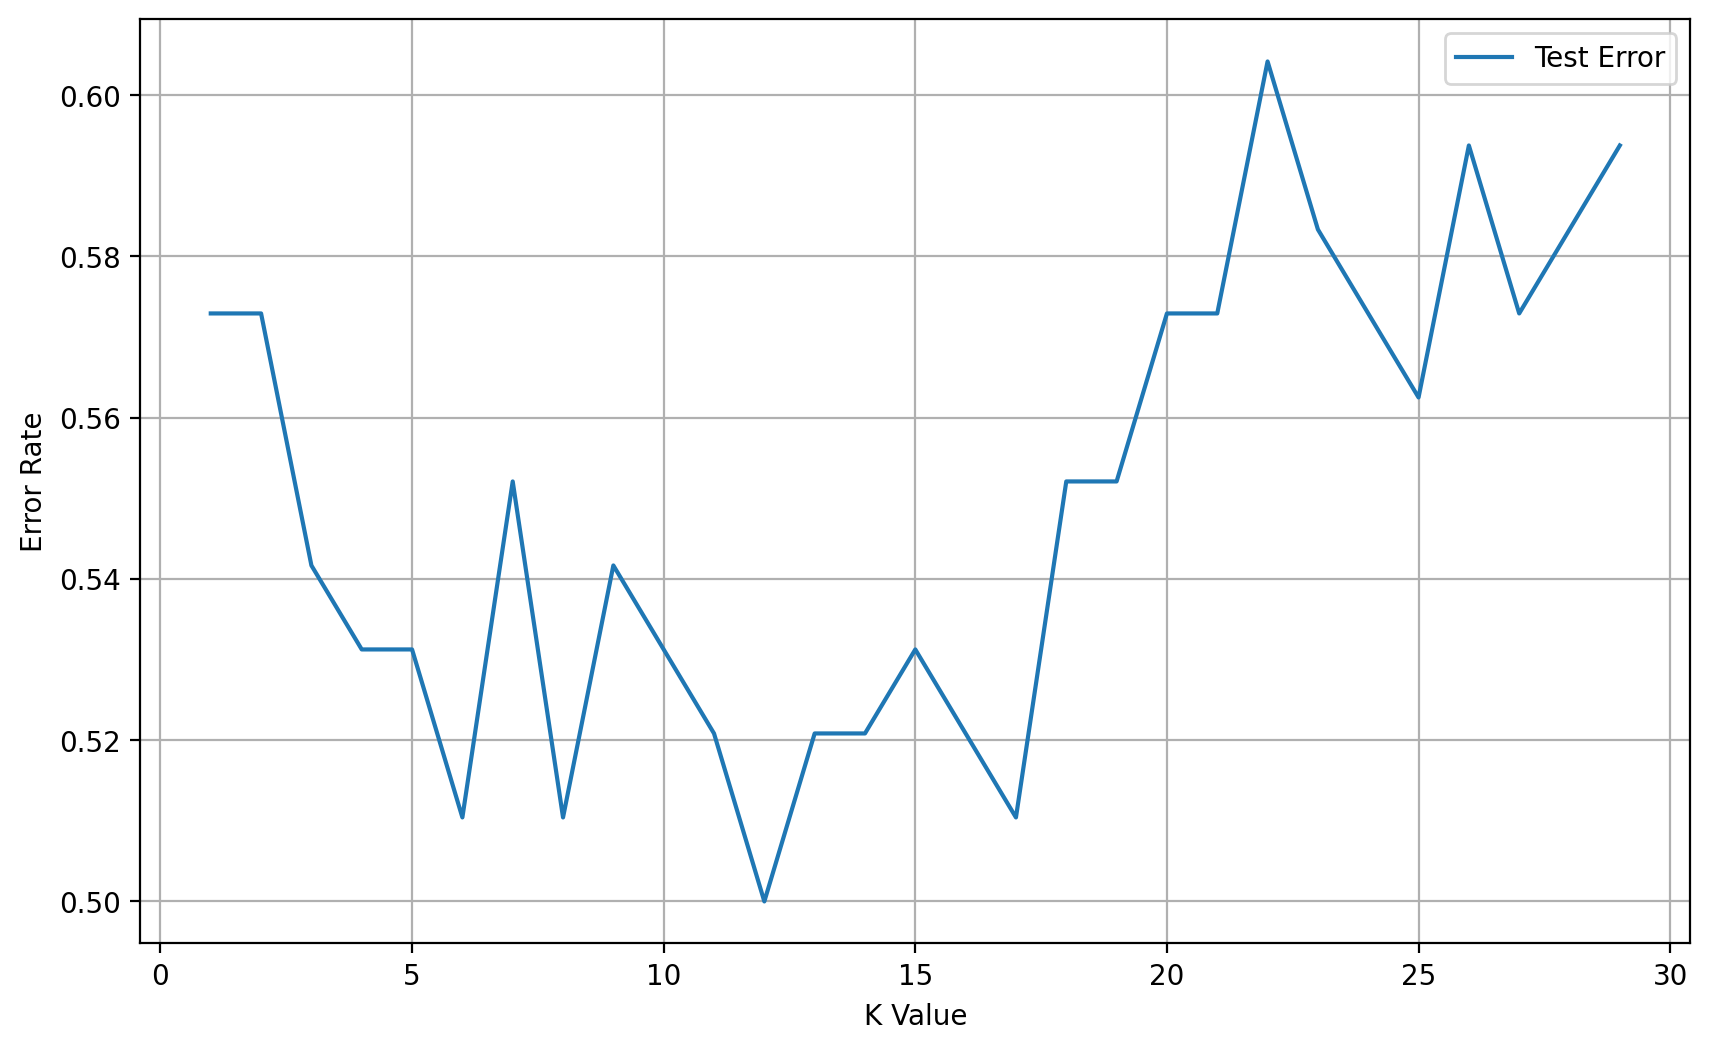

In [17]:
plt.figure(figsize = (10,6), dpi = 200)
plt.plot(range(1, 30), error_rates, label = 'Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.grid()

## Running KNN for best value of K 

In [18]:
knn_model = KNeighborsClassifier(n_neighbors = 12, weights = 'distance') 
    
knn_model.fit(scaled_X_train.values, train_Y.values.ravel())

grade_prediction = []

for index, row in scaled_test_df.iterrows():

    test_value = (row['Size in Bytes'], 
                  row['Revisions'], 
                  row['Registered Edits'], 
                  row['IP Edits'], 
                  row['Bot Edits'], 
                  row['Unique Editors'], 
                  # row['Major Edits'], 
                  # row['Minor Edits'], 
                  # row['Semi Auto Edits'], 
                  # row['Reverted Edits'], 
                  row['Average Time Between Edits'], 
                  row['Average Edits Per User'],
                  # row['Average Edits Per Day'], 
                  # row['Average Edits Per Month'], 
                  row['Average Edits Per Year'], 
                  row['Edits Made By Top 10'], 
                  row['Registered Editors'], 
                  row['IP Editors'], 
                  row['Bot Editors']
                 )

    prediction_Y = knn_model.predict([test_value])

    grade_prediction.append(prediction_Y[0])

scaled_test_df['Grade Prediction'] = grade_prediction

accuracy_score = accuracy_score(test_Y, scaled_test_df['Grade Prediction'])

accuraccy = 'Accuracy Score: ' + str(100 * (accuracy_score)) + '%'

accuraccy

'Accuracy Score: 50.0%'

## Checking the acuraccy score for grades within one value 

In [19]:
scaled_test_df['Within One'] = scaled_test_df.apply(find_grade_within_one, axis = 1)

In [20]:
within_one = 'Accuracy Score: ' + str(100 * (len(scaled_test_df.loc[scaled_test_df['Within One'] == True]) / len(scaled_test_df)))

within_one

'Accuracy Score: 81.25'